In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the train data
df=pd.read_csv('Flightsdata.csv')
df

,Unnamed: 0,Airline,Date of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,0,G8330,20/01/2023,DEL,BOM,21:00,23:15,2h15m,non-stop,3800
1,1,G82501,20/01/2023,DEL,BOM,02:40,04:50,2h10m,non-stop,4403
2,2,G8354,20/01/2023,DEL,BOM,22:30,00:40,2h10m,non-stop,4403
3,3,G8530,20/01/2023,DEL,BOM,06:00,08:10,2h10m,non-stop,4403
4,4,UK975,20/01/2023,DEL,BOM,05:45,08:00,2h15m,non-stop,4535
...,...,...,...,...,...,...,...,...,...,...
2891,2891,UK850,03/02/2023,BLR,BOM,19:55,21:40,1h45m,non-stop,5616
2892,2892,I51532,03/02/2023,BLR,LKO,18:45,21:10,2h25m,non-stop,3649
2893,2893,G8808,03/02/2023,BLR,LKO,16:05,18:25,2h20m,non-stop,3915
2894,2894,I52472,03/02/2023,BLR,LKO,06:50,09:15,2h25m,non-stop,4440


There are 2896 rows and 10 columns in the dataset

In [3]:
#Dropping off unnecessary column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
#Checking Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2896 non-null   object
 1   Date of Journey  2896 non-null   object
 2   Source           2896 non-null   object
 3   Destination      2896 non-null   object
 4   Departure Time   2896 non-null   object
 5   Arrival Time     2896 non-null   object
 6   Duration         2896 non-null   object
 7   Total Stops      2896 non-null   object
 8   Price            2896 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 203.8+ KB


All columns are object types except Price column

In [5]:
df

,Airline,Date of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,G8330,20/01/2023,DEL,BOM,21:00,23:15,2h15m,non-stop,3800
1,G82501,20/01/2023,DEL,BOM,02:40,04:50,2h10m,non-stop,4403
2,G8354,20/01/2023,DEL,BOM,22:30,00:40,2h10m,non-stop,4403
3,G8530,20/01/2023,DEL,BOM,06:00,08:10,2h10m,non-stop,4403
4,UK975,20/01/2023,DEL,BOM,05:45,08:00,2h15m,non-stop,4535
...,...,...,...,...,...,...,...,...,...
2891,UK850,03/02/2023,BLR,BOM,19:55,21:40,1h45m,non-stop,5616
2892,I51532,03/02/2023,BLR,LKO,18:45,21:10,2h25m,non-stop,3649
2893,G8808,03/02/2023,BLR,LKO,16:05,18:25,2h20m,non-stop,3915
2894,I52472,03/02/2023,BLR,LKO,06:50,09:15,2h25m,non-stop,4440


In [6]:
#Checking null
df.isnull().sum()

Airline            0
Date of Journey    0
Source             0
Destination        0
Departure Time     0
Arrival Time       0
Duration           0
Total Stops        0
Price              0
dtype: int64

In [7]:
#Checking uniques
df['Airline'].unique()

array(['G8330', 'G82501', 'G8354', 'G8530', 'UK975', 'UK941', 'G8346',
       '6E2112', '6E2716', '6E2519', 'AI441', 'AI863', 'AI805', 'AI678',
       'UK977', 'UK955', 'UK957', 'UK951', '6E2176', '6E5218', 'G8336',
       '6E5318', 'SG8169', '6E2526', 'G8323', 'SG8709', '6E2084',
       '6E2017', '6E2016', '6E6814', '6E864', '6E2075', '6E2114', 'AI605',
       'AI624', 'AI865', 'AI814', 'UK943', 'UK927', 'UK981', 'UK995',
       'UK963', 'UK933', 'UK993', 'I5788', '6E789', '6E6232', 'I5548',
       'I5745', 'AI811', 'AI411', 'AI431', 'UK641', '6E2107', '6E2427',
       '6E2251', '6E7148', '6E2319', '9I645', '6E2376', '9I809', 'G8395',
       '6E5323', 'AI604', '6E5201', '6.00E+176', '6E5295', '6E488',
       '6E5293', 'UK846', 'UK858', 'G8320', 'I5613', 'AI610', 'AI642',
       '6E5251', 'I5334', 'G8399', 'I51782', '6E5351', 'UK508', '6E5376',
       '6E5283', '6E5204', '6E5255', 'UK852', 'AI640', 'UK850', 'UK854',
       'UK864', 'UK866', '6.00E+196', '6E6353', 'I51532', 'I52472',
  

lets rename all flight airline carrier numbers to in Airline name

In [52]:
df['Airline'] = df['Airline'].replace({'G8330':'Go Air','G82501':'Go First','G8354':'Go First','G8530':'Go First','UK975':'Vistara','UK941':'Vistara','G8346':'Go First','6E2112':'IndiGo','6E2716':'IndiGo','6E2519':'IndiGo',
                                       'AI441':'Air India','AI863':'Air India','AI805':'Air India','AI678':'Air India','UK977':'Vistara','UK955':'Vistara','UK957':'Vistara','UK951':'Vistara','6E2176':'IndiGo','6E5218':'IndiGo',
                                       'G8336':'Go First','6E5318':'IndiGo','SG8169':'SpiceXpress','6E2526':'IndiGo','G8323':'Go First','SG8709':'SpiceXpress','6E2084':'IndiGo','6E2017':'IndiGo','6E2016':'IndiGo','6E6814':'IndiGo',
                                       '6E864':'IndiGo','6E2075':'IndiGo','6E2114':'IndiGo','AI605':'Air India','AI624':'Air India','AI865':'Air India','AI814':'Air India','UK943':'Vistara','UK927':'Vistara','UK981':'Vistara',
                                       'UK995':'Vistara','UK963':'Vistara','UK933':'Vistara','UK993':'Vistara','I5788':'AirAsia India','6E789':'IndiGo','6E6232':'IndiGo','I5548':'AirAsia India','I5745':'AirAsia India','AI811':'Air India',
                                       'AI411':'Air India','AI431':'Air India','UK641':'Vistara','6E2107':'IndiGo','6E2427':'IndiGo','6E2251':'IndiGo','6E7148':'IndiGo','6E2319':'IndiGo','9I645':'Alliance Air','6E2376':'IndiGo',
                                       '9I809':'Alliance Air','G8395':'Go First','6E5323':'IndiGo','AI604':'Air India','6E5201':'IndiGo','6E176':'IndiGo','6E5295':'IndiGo','6E488':'IndiGo','6E5293':'IndiGo','UK846':'Vistara',
                                       'UK858':'Vistara','G8320':'Go First','I5613':'AirAsia India','AI610':'Air India','AI642':'Air India','6E5251':'IndiGo','I5334':'AirAsia India','G8399':'Go First','I51782':'AirAsia India','6E5351':'IndiGo',
                                       'UK508':'Vistara','6E5376':'IndiGo','6E5283':'IndiGo','6E5204':'IndiGo','6E5255':'IndiGo','UK852':'Vistara','AI640':'Air India','UK850':'Vistara','UK854':'Vistara',
                                       'UK864':'Vistara','UK866':'Vistara','6E196':'IndiGo','6E6353':'IndiGo','I51532':'Alliance Air','I52472':'AirAsia India','G8808':'Go First','6E451':'IndiGo','AI616':'Air India','UK872':'Vistara',
                                       'UK878':'Vistara','AI618':'Air India','6E5245':'IndiGo','6E773':'IndiGo','6E5384':'IndiGo','6E5268':'IndiGo','6E163':'IndiGo','6.00E+176':'IndiGo','6.00E+163':'IndiGo','6.00E+196':'IndiGo','UK874':'Vistara','UK888':'Vistara','6E6591':'IndiGo',
                                       '6E5257':'IndiGo','AI698':'Air India','UK876':'Vistara','6E6438':'IndiGo','6E866':'IndiGo','6E5389':'IndiGo','UK985':'Vistara','AI636':'Air India','6E2328':'Air India','6E5073':'IndiGo',
                                       'AI608':'Air India','6E6356':'IndiGo','SG8701':'SpiceXpress','G8334':'Go First','UK945':'Vistara','AI887':'Air India','AI665':'AirAsia India','6E2505':'IndiGo','6E2138':'IndiGo','AI840/AI431':'Air India',
                                       'AI543/AI811':'Air India','AI559/AI811':'Air India','AI559/AI431':'Air India','UK830/UK641':'Vistara','UK860/UK641':'Vistara','AI616/AI625':'Air India','UK870/UK641':'Vistara','UK890/UK641':'Vistara','AI618/AI625':'Air India','AI618/AI687/AI431':'Air India',
                                       'AI616/AI677/AI811':'Air India','AI698/AI625':'Air India','I51518/I52472':'AirAsia India','I5974/I52472':'AirAsia India', 'UK872/UK994/UK641':'Vistara','I51229/I52472':'AirAsia India','AI515/AI501/AI811':'Air India','AI515/AI501/AI431':'Air India','I51543/I51532':'AirAsia India',
                                       'AI525/AI402/AI811':'Air India','UK898/UK816/UK641':'Vistara','I5612/I51532':'AirAsia India','UK894/UK810/UK641':'Vistara','UK876/UK994/UK641':'Vistara','9I301':'Alliance Air','9I605':'Alliance Air','I5784':'AirAsia India','G82509':'Go First','6E2282':'IndiGo','6E5207':'IndiGo',
                                       'G8188':'Go First','G8211':'Go First','G82618':'Go First','6E2025':'IndiGo'})

In [53]:
df['Airline'].unique()

array(['Go Air', 'Go First', 'Vistara', 'IndiGo', 'Air India',
       'SpiceXpress', 'AirAsia India', 'Alliance Air'], dtype=object)

We have replaced all the airline numbers to airline names

In [10]:
#Checking uniques
df['Source'].unique()

array(['DEL', 'BLR', 'HYD'], dtype=object)

Lets rename 'DEL' as Delhi, 'BLR' as Bangalore, 'HYD' as Hyderabad

In [11]:
df['Source'] = df['Source'].replace({'DEL':'New Delhi','BLR':'Bangalore','HYD':'Hyderabad'})

In [12]:
df['Source'].unique()

array(['New Delhi', 'Bangalore', 'Hyderabad'], dtype=object)

In [13]:
df['Destination'].unique()

array(['BOM', 'LKO'], dtype=object)

In [14]:
df['Destination'] = df['Destination'].replace({'BOM':'Mumbai','LKO':'Lucknow'})

In [15]:
df['Destination'].unique()

array(['Mumbai', 'Lucknow'], dtype=object)

<AxesSubplot:xlabel='Airline', ylabel='count'>

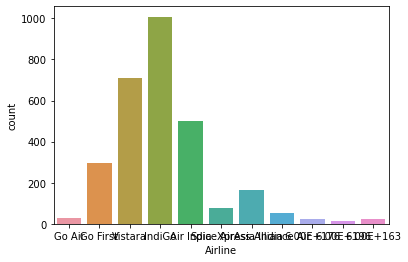

In [16]:
#Lets check 
sns.countplot(df['Airline'])

Most of the flights were IndiGo more than 1000 flights and followed by Vistara more than 700 and less airlines of Go Air company

In [17]:
df['Duration'].unique()

array(['2h15m', '2h10m', '2h30m', '2h5m', '2h20m', '2h25m', '1h55m',
       '2h0m', '1h10m', '1h20m', '1h15m', '1h5m', '1h30m', '3h0m',
       '3h25m', '1h40m', '1h45m', '1h50m', '2h35m', '1h35m', '1h25m',
       '3h45m', '16h55m', '9h40m', '13h20m', '7h0m', '4h40m', '7h50m',
       '5h5m', '18h20m', '21h10m', '11h30m', '14h55m', '12h15m', '8h10m',
       '13h35m', '9h45m', '6h50m', '13h50m', '10h0m', '17h25m', '17h15m'],
      dtype=object)

In [18]:
df.Duration.value_counts()

2h15m     484
2h10m     308
1h45m     245
1h40m     228
1h35m     195
2h25m     187
1h50m     182
2h5m      164
2h0m      141
2h20m     139
1h55m     130
1h10m     106
1h30m      61
1h15m      58
1h5m       58
2h30m      51
2h35m      46
1h25m      25
3h45m      21
1h20m      16
3h25m      15
3h0m       15
11h30m      2
14h55m      1
17h25m      1
10h0m       1
13h50m      1
6h50m       1
9h45m       1
13h35m      1
8h10m       1
12h15m      1
21h10m      1
18h20m      1
5h5m        1
7h50m       1
4h40m       1
7h0m        1
13h20m      1
9h40m       1
16h55m      1
17h15m      1
Name: Duration, dtype: int64

We will change the total duration into mins. For that fiest we have to split the 'h' and 'm' from the columns and seperate the hour and minutes columns.

In [19]:
# Extract hours and minutes from the Duration column
df[['Hours', 'Minutes']] = df['Duration'].str.extract(r'(\d+)h(\d+)m')

# Convert the extracted hours and minutes to integers
df[['Hours', 'Minutes']] = df[['Hours', 'Minutes']].astype(int)

# Rename the columns
df.rename(columns={'Hours': 'Hours Duration', 'Minutes': 'Minutes Duration'}, inplace=True)

In [20]:
df

,Airline,Date of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Hours Duration,Minutes Duration
0,Go Air,20/01/2023,New Delhi,Mumbai,21:00,23:15,2h15m,non-stop,3800,2,15
1,Go First,20/01/2023,New Delhi,Mumbai,02:40,04:50,2h10m,non-stop,4403,2,10
2,Go First,20/01/2023,New Delhi,Mumbai,22:30,00:40,2h10m,non-stop,4403,2,10
3,Go First,20/01/2023,New Delhi,Mumbai,06:00,08:10,2h10m,non-stop,4403,2,10
4,Vistara,20/01/2023,New Delhi,Mumbai,05:45,08:00,2h15m,non-stop,4535,2,15
...,...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,03/02/2023,Bangalore,Mumbai,19:55,21:40,1h45m,non-stop,5616,1,45
2892,Alliance Air,03/02/2023,Bangalore,Lucknow,18:45,21:10,2h25m,non-stop,3649,2,25
2893,Go First,03/02/2023,Bangalore,Lucknow,16:05,18:25,2h20m,non-stop,3915,2,20
2894,AirAsia India,03/02/2023,Bangalore,Lucknow,06:50,09:15,2h25m,non-stop,4440,2,25


In [21]:
df['Minutes Duration'] = df['Hours Duration'] * 60 + df['Minutes Duration']
df.drop(columns='Hours Duration', inplace=True)

In [22]:
df

,Airline,Date of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Minutes Duration
0,Go Air,20/01/2023,New Delhi,Mumbai,21:00,23:15,2h15m,non-stop,3800,135
1,Go First,20/01/2023,New Delhi,Mumbai,02:40,04:50,2h10m,non-stop,4403,130
2,Go First,20/01/2023,New Delhi,Mumbai,22:30,00:40,2h10m,non-stop,4403,130
3,Go First,20/01/2023,New Delhi,Mumbai,06:00,08:10,2h10m,non-stop,4403,130
4,Vistara,20/01/2023,New Delhi,Mumbai,05:45,08:00,2h15m,non-stop,4535,135
...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,03/02/2023,Bangalore,Mumbai,19:55,21:40,1h45m,non-stop,5616,105
2892,Alliance Air,03/02/2023,Bangalore,Lucknow,18:45,21:10,2h25m,non-stop,3649,145
2893,Go First,03/02/2023,Bangalore,Lucknow,16:05,18:25,2h20m,non-stop,3915,140
2894,AirAsia India,03/02/2023,Bangalore,Lucknow,06:50,09:15,2h25m,non-stop,4440,145


In [23]:
df.rename(columns={'Minutes Duration': 'Duration in Minutes'}, inplace=True)
df

,Airline,Date of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Duration in Minutes
0,Go Air,20/01/2023,New Delhi,Mumbai,21:00,23:15,2h15m,non-stop,3800,135
1,Go First,20/01/2023,New Delhi,Mumbai,02:40,04:50,2h10m,non-stop,4403,130
2,Go First,20/01/2023,New Delhi,Mumbai,22:30,00:40,2h10m,non-stop,4403,130
3,Go First,20/01/2023,New Delhi,Mumbai,06:00,08:10,2h10m,non-stop,4403,130
4,Vistara,20/01/2023,New Delhi,Mumbai,05:45,08:00,2h15m,non-stop,4535,135
...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,03/02/2023,Bangalore,Mumbai,19:55,21:40,1h45m,non-stop,5616,105
2892,Alliance Air,03/02/2023,Bangalore,Lucknow,18:45,21:10,2h25m,non-stop,3649,145
2893,Go First,03/02/2023,Bangalore,Lucknow,16:05,18:25,2h20m,non-stop,3915,140
2894,AirAsia India,03/02/2023,Bangalore,Lucknow,06:50,09:15,2h25m,non-stop,4440,145


In [26]:
import datetime
df['Month'] = pd.DatetimeIndex(df['Date of Journey']).month

In [27]:
df

,Airline,Date of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Duration in Minutes,Month
0,Go Air,20/01/2023,New Delhi,Mumbai,21:00,23:15,2h15m,non-stop,3800,135,1
1,Go First,20/01/2023,New Delhi,Mumbai,02:40,04:50,2h10m,non-stop,4403,130,1
2,Go First,20/01/2023,New Delhi,Mumbai,22:30,00:40,2h10m,non-stop,4403,130,1
3,Go First,20/01/2023,New Delhi,Mumbai,06:00,08:10,2h10m,non-stop,4403,130,1
4,Vistara,20/01/2023,New Delhi,Mumbai,05:45,08:00,2h15m,non-stop,4535,135,1
...,...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,03/02/2023,Bangalore,Mumbai,19:55,21:40,1h45m,non-stop,5616,105,3
2892,Alliance Air,03/02/2023,Bangalore,Lucknow,18:45,21:10,2h25m,non-stop,3649,145,3
2893,Go First,03/02/2023,Bangalore,Lucknow,16:05,18:25,2h20m,non-stop,3915,140,3
2894,AirAsia India,03/02/2023,Bangalore,Lucknow,06:50,09:15,2h25m,non-stop,4440,145,3


We will map the each month with the month name

In [28]:
df['Month'] = df['Month'].replace({1: 'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',
                                  10:'Oct',11:'Nov',12:'Dec'})

Lets drop the Date of journey column

In [29]:
df.drop(['Date of Journey'],axis=1,inplace=True)
df

,Airline,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Duration in Minutes,Month
0,Go Air,New Delhi,Mumbai,21:00,23:15,2h15m,non-stop,3800,135,Jan
1,Go First,New Delhi,Mumbai,02:40,04:50,2h10m,non-stop,4403,130,Jan
2,Go First,New Delhi,Mumbai,22:30,00:40,2h10m,non-stop,4403,130,Jan
3,Go First,New Delhi,Mumbai,06:00,08:10,2h10m,non-stop,4403,130,Jan
4,Vistara,New Delhi,Mumbai,05:45,08:00,2h15m,non-stop,4535,135,Jan
...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,Bangalore,Mumbai,19:55,21:40,1h45m,non-stop,5616,105,Mar
2892,Alliance Air,Bangalore,Lucknow,18:45,21:10,2h25m,non-stop,3649,145,Mar
2893,Go First,Bangalore,Lucknow,16:05,18:25,2h20m,non-stop,3915,140,Mar
2894,AirAsia India,Bangalore,Lucknow,06:50,09:15,2h25m,non-stop,4440,145,Mar


In [34]:
#Lets Rename  Departure Time as Departure and Arrival Time as  Arrival
# Use the rename() function to rename the column headers
df = df.rename(columns={'Departure Time': 'Departure', 'Arrival Time': 'Arrival', 'Month': 'Month of Journey'})
df

,Airline,Source,Destination,Departure,Arrival,Duration,Total Stops,Price,Duration in Minutes,Month of Journey
0,Go Air,New Delhi,Mumbai,21:00,23:15,2h15m,non-stop,3800,135,Jan
1,Go First,New Delhi,Mumbai,02:40,04:50,2h10m,non-stop,4403,130,Jan
2,Go First,New Delhi,Mumbai,22:30,00:40,2h10m,non-stop,4403,130,Jan
3,Go First,New Delhi,Mumbai,06:00,08:10,2h10m,non-stop,4403,130,Jan
4,Vistara,New Delhi,Mumbai,05:45,08:00,2h15m,non-stop,4535,135,Jan
...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,Bangalore,Mumbai,19:55,21:40,1h45m,non-stop,5616,105,Mar
2892,Alliance Air,Bangalore,Lucknow,18:45,21:10,2h25m,non-stop,3649,145,Mar
2893,Go First,Bangalore,Lucknow,16:05,18:25,2h20m,non-stop,3915,140,Mar
2894,AirAsia India,Bangalore,Lucknow,06:50,09:15,2h25m,non-stop,4440,145,Mar


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2896 non-null   object
 1   Source               2896 non-null   object
 2   Destination          2896 non-null   object
 3   Departure            2896 non-null   object
 4   Arrival              2896 non-null   object
 5   Duration             2896 non-null   object
 6   Total Stops          2896 non-null   object
 7   Price                2896 non-null   int64 
 8   Duration in Minutes  2896 non-null   int32 
 9   Month of Journey     2896 non-null   object
dtypes: int32(1), int64(1), object(8)
memory usage: 215.1+ KB


I will now split the deaprture time and arrival time as per the time of departure.

In [36]:
df['DepTime']=df.Departure.str.split(':').str[0]
df['ArrTime']=df.Arrival.str.split(':').str[0]

In [37]:
df.drop(['Departure','Arrival'],axis=1,inplace=True)
df

,Airline,Source,Destination,Duration,Total Stops,Price,Duration in Minutes,Month of Journey,DepTime,ArrTime
0,Go Air,New Delhi,Mumbai,2h15m,non-stop,3800,135,Jan,21,23
1,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,02,04
2,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,22,00
3,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,06,08
4,Vistara,New Delhi,Mumbai,2h15m,non-stop,4535,135,Jan,05,08
...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,Bangalore,Mumbai,1h45m,non-stop,5616,105,Mar,19,21
2892,Alliance Air,Bangalore,Lucknow,2h25m,non-stop,3649,145,Mar,18,21
2893,Go First,Bangalore,Lucknow,2h20m,non-stop,3915,140,Mar,16,18
2894,AirAsia India,Bangalore,Lucknow,2h25m,non-stop,4440,145,Mar,06,09


In [38]:
df[["DepTime", "ArrTime"]] = df[["DepTime", "ArrTime"]].apply(pd.to_numeric)

In [42]:
#Lets change the time to Early morning, morning, Noon, Eve and Night.

#For that we have to create the function and apply while creating the new column.
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [43]:
df['Dep'] = df['DepTime'].apply(f)
df['Arr'] = df['ArrTime'].apply(f)
df

,Airline,Source,Destination,Duration,Total Stops,Price,Duration in Minutes,Month of Journey,DepTime,ArrTime,Dep,Arr
0,Go Air,New Delhi,Mumbai,2h15m,non-stop,3800,135,Jan,21,23,Night,Night
1,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,2,4,Late Night,Late Night
2,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,22,0,Night,Late Night
3,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,6,8,Early Morning,Early Morning
4,Vistara,New Delhi,Mumbai,2h15m,non-stop,4535,135,Jan,5,8,Early Morning,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,Bangalore,Mumbai,1h45m,non-stop,5616,105,Mar,19,21,Evening,Night
2892,Alliance Air,Bangalore,Lucknow,2h25m,non-stop,3649,145,Mar,18,21,Evening,Night
2893,Go First,Bangalore,Lucknow,2h20m,non-stop,3915,140,Mar,16,18,Noon,Evening
2894,AirAsia India,Bangalore,Lucknow,2h25m,non-stop,4440,145,Mar,6,9,Early Morning,Morning


In [44]:
#Lets drop the unnecessary column.

df.drop(['DepTime','ArrTime'],axis=1,inplace=True)
df

,Airline,Source,Destination,Duration,Total Stops,Price,Duration in Minutes,Month of Journey,Dep,Arr
0,Go Air,New Delhi,Mumbai,2h15m,non-stop,3800,135,Jan,Night,Night
1,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,Late Night,Late Night
2,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,Night,Late Night
3,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,Early Morning,Early Morning
4,Vistara,New Delhi,Mumbai,2h15m,non-stop,4535,135,Jan,Early Morning,Early Morning
...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,Bangalore,Mumbai,1h45m,non-stop,5616,105,Mar,Evening,Night
2892,Alliance Air,Bangalore,Lucknow,2h25m,non-stop,3649,145,Mar,Evening,Night
2893,Go First,Bangalore,Lucknow,2h20m,non-stop,3915,140,Mar,Noon,Evening
2894,AirAsia India,Bangalore,Lucknow,2h25m,non-stop,4440,145,Mar,Early Morning,Morning


Seasons plays the important role in determining the flight price.

We all know that flight price will be high during Summer and Winter vacations. Generally the fares are lower during the monsoon.

Hence I am going to create a new column as Season and will name it High Low and Shoulder season depending on the month the flight is operating.

In [46]:
df.loc[df['Month of Journey'] == 'Jan','Season'] ='High'
df.loc[df['Month of Journey'] == 'Feb','Season'] ='Shoulder'
df.loc[df['Month of Journey'] == 'Mar','Season'] ='Shoulder'
df.loc[df['Month of Journey'] == 'Apr','Season'] ='Shoulder'
df.loc[df['Month of Journey'] == 'May','Season'] ='High'
df.loc[df['Month of Journey'] == 'Jun','Season'] ='Shoulder'
df.loc[df['Month of Journey'] == 'Jul','Season'] ='Low'
df.loc[df['Month of Journey'] == 'Aug','Season'] ='Low'
df.loc[df['Month of Journey'] == 'Sep','Season'] ='Shoulder'
df.loc[df['Month of Journey'] == 'Oct','Season'] ='High'
df.loc[df['Month of Journey'] == 'Nov','Season'] ='Shoulder'
df.loc[df['Month of Journey'] == 'Dec','Season'] ='High'


df

,Airline,Source,Destination,Duration,Total Stops,Price,Duration in Minutes,Month of Journey,Dep,Arr,Season
0,Go Air,New Delhi,Mumbai,2h15m,non-stop,3800,135,Jan,Night,Night,High
1,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,Late Night,Late Night,High
2,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,Night,Late Night,High
3,Go First,New Delhi,Mumbai,2h10m,non-stop,4403,130,Jan,Early Morning,Early Morning,High
4,Vistara,New Delhi,Mumbai,2h15m,non-stop,4535,135,Jan,Early Morning,Early Morning,High
...,...,...,...,...,...,...,...,...,...,...,...
2891,Vistara,Bangalore,Mumbai,1h45m,non-stop,5616,105,Mar,Evening,Night,Shoulder
2892,Alliance Air,Bangalore,Lucknow,2h25m,non-stop,3649,145,Mar,Evening,Night,Shoulder
2893,Go First,Bangalore,Lucknow,2h20m,non-stop,3915,140,Mar,Noon,Evening,Shoulder
2894,AirAsia India,Bangalore,Lucknow,2h25m,non-stop,4440,145,Mar,Early Morning,Morning,Shoulder


# Lets Visualize the data

In [47]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total Stops', 'Price',
       'Duration in Minutes', 'Month of Journey', 'Dep', 'Arr', 'Season'],
      dtype='object')

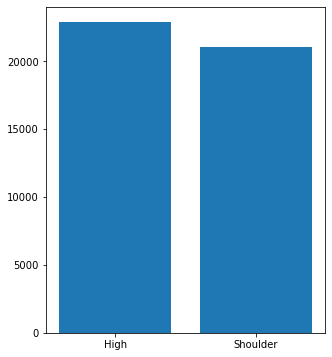

In [48]:
fig = plt.figure(figsize =(5,6))
plt.bar(df['Season'], df['Price'])
plt.show()

Since there is no data from the month that makes the low season, we can clearly see that price of the ticket is high during the High Season

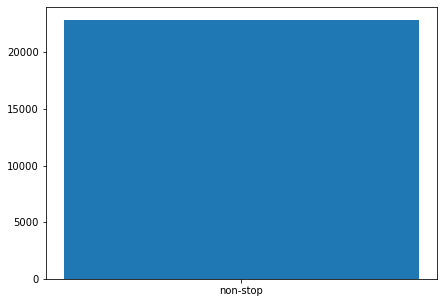

In [50]:
fig = plt.figure(figsize =(7,5))
plt.bar(df['Total Stops'], df['Price'])
plt.show()

Most of the flights are non-stop so price is higher

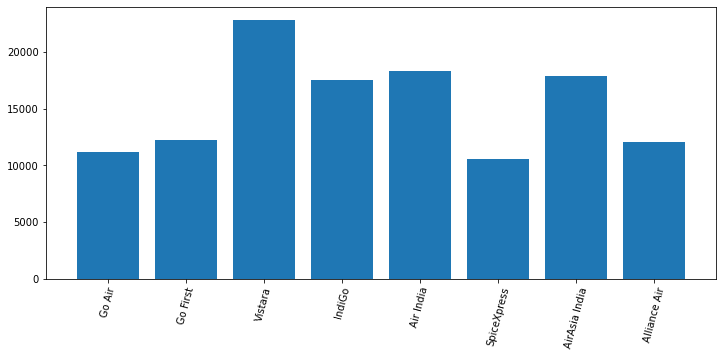

In [54]:
fig = plt.figure(figsize =(12,5))
plt.bar(df['Airline'], df['Price'])
plt.xticks(rotation=75)
plt.show()

We can observe that fares are high for Vistara and less for SpiceXpress

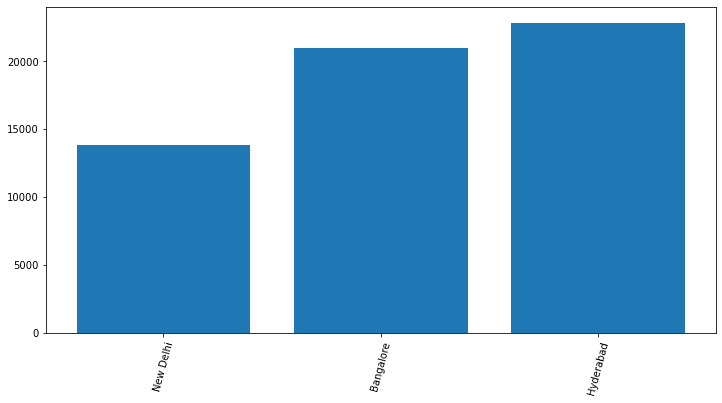

In [55]:
fig = plt.figure(figsize =(12,6))
plt.bar(df['Source'], df['Price'])
plt.xticks(rotation=75)
plt.show()

if the sourse id Hyderabad flights price were very high

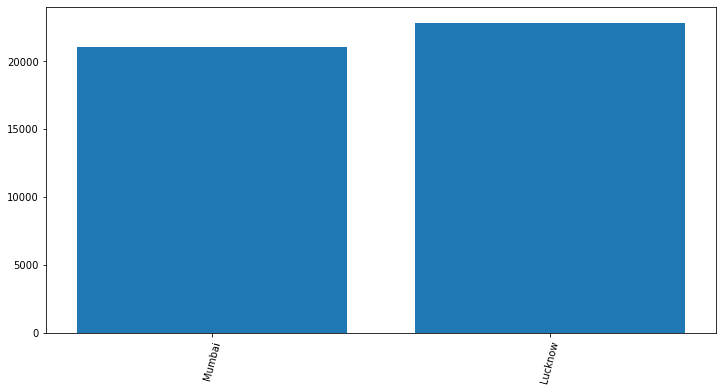

In [56]:
fig = plt.figure(figsize =(12,6))
plt.bar(df['Destination'], df['Price'])
plt.xticks(rotation=75)
plt.show()

if the destination of flight is Lucknow price is very high

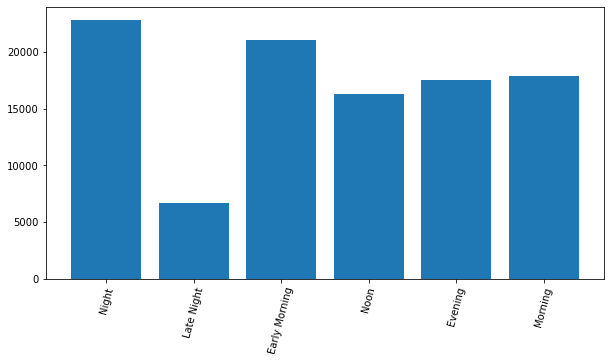

In [57]:
fig = plt.figure(figsize =(10,5))
plt.bar(df['Dep'], df['Price'])
plt.xticks(rotation=75)
plt.show()

Flights deaprting Night tends to have the higher price. Lowest price is available for the fligts departing Late Night

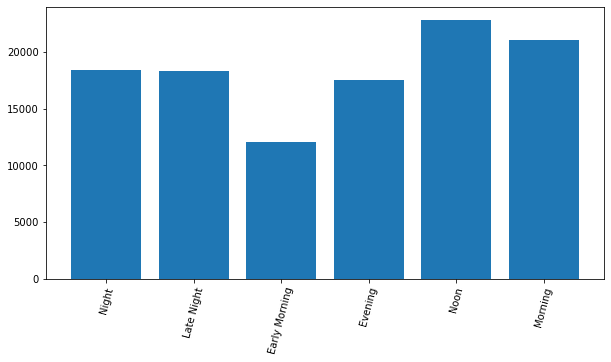

In [59]:
fig = plt.figure(figsize =(10,5))
plt.bar(df['Arr'], df['Price'])
plt.xticks(rotation=75)
plt.show()

Flights arriving in the Noon have higher price.

<AxesSubplot:xlabel='Price', ylabel='Duration in Minutes'>

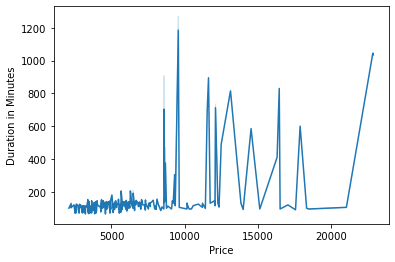

In [61]:
sns.lineplot(x='Price',y='Duration in Minutes',data=df)

There is no corelation we can find with travel time and price.


Since all of our feature is categorical we will not be checking the skewness and outliers in this dataset.


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2896 non-null   object
 1   Source               2896 non-null   object
 2   Destination          2896 non-null   object
 3   Duration             2896 non-null   object
 4   Total Stops          2896 non-null   object
 5   Price                2896 non-null   int64 
 6   Duration in Minutes  2896 non-null   int32 
 7   Month of Journey     2896 non-null   object
 8   Dep                  2896 non-null   object
 9   Arr                  2896 non-null   object
 10  Season               2896 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 237.7+ KB


Now we will be changing all the categorical feature to numerical.

In [63]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [64]:
df

,Airline,Source,Destination,Duration,Total Stops,Price,Duration in Minutes,Month of Journey,Dep,Arr,Season
0,3,2,1,25,0,3800,135,1,4,4,0
1,4,2,1,24,0,4403,130,1,2,2,0
2,4,2,1,24,0,4403,130,1,4,2,0
3,4,2,1,24,0,4403,130,1,0,0,0
4,7,2,1,25,0,4535,135,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2891,7,0,1,18,0,5616,105,2,1,4,1
2892,2,0,0,27,0,3649,145,2,1,4,1
2893,4,0,0,26,0,3915,140,2,5,1,1
2894,1,0,0,27,0,4440,145,2,0,3,1


We are now going to split the data between input and target variable.

In [65]:
x=df.drop(['Price'],axis=1)
y=df['Price']
y=pd.DataFrame(data=y)

We will bring our data to the standard scale using Standard Scaler



In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x,columns=x.columns)

Sperating the test dataset.

In [68]:
df_test=sc_x[2897:]

In [70]:
y.dropna(how='all',axis=0,inplace=True)
x.shape, y.shape

((2896, 10), (2896, 1))

# Model Fitting and Selection

In [71]:
#Importing all the libraries for model fitting and cross validation.

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will check the best possible random state to train our model. Using LinearRegression to check and then later will run with other models.


In [72]:

MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 131 is 0.37444592853209824


# We can see that the best random state is 131. We will split the data with this random state.

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=131)


Checking the best kernellist for SVR model

In [74]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.11607440136831715
0.02264997951312875
0.011371711231247139


We will select linear for testing the model


# Fitting the data to various model and checking the accuracy

In [75]:
sv=SVR(kernel='linear')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,sv,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,18.460730,37.444593,3.050565e+06,21.188334
1,SupportVector,11.607440,38.270193,3.010304e+06,16.695539
2,DecisionTree,46.296021,44.427564,2.710035e+06,35.681818
3,RandomForest,45.869237,41.432039,2.856114e+06,37.415768
4,KNN,34.884952,38.576205,2.995381e+06,-12.868053
5,AdaBoost,9.902045,20.362907,3.883567e+06,5.465829
6,GradientBoosting,35.878099,40.708688,2.891389e+06,33.461042
7,Lasso,18.460114,37.440102,3.050784e+06,21.191062
8,Ridge,18.460664,37.444100,3.050589e+06,21.189579


Observation
1. GradientBoosting model has performed well with least difference between test and CV score.
2. GradientBoosting test accuracy is 40% with CV score of 33%
3. RandomForest has given us the best test accuracy of 41% with highest CV score of 37%

We will select this as our final model and Hypertune it


# HyperTuning

In [76]:
#Importing the libraries for Hypertuning
from sklearn.model_selection import GridSearchCV

# Hypertuning of GradientBoostingRegressor
GradientBoostingRegressor does not have much of the parameters. Hence we will select the below parameters to hypertune it.

In [77]:
parameters = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth':[3,5,8],
    'n_estimators':[100,200,300,500]}

In [78]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=3)
GCV.fit(x_train,y_train)

print(GCV.best_params_)

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}


We will now fit thw above parameters with the model.

In [79]:
Finalmod=GradientBoostingRegressor(learning_rate=0.01,max_depth=8,n_estimators=500)
Finalmod.fit(x_train,y_train)
pred_test=Finalmod.predict(x_test)
R2=r2_score(y_test,pred_test)
scores=cross_val_score(Finalmod,x,y,cv=kf)
MSE = mean_squared_error(y_test,pred_test)
print('GradientBoostingRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2*100)
print('Cross Validation score',scores.mean()*100)
print('Mean Square Error',MSE)

GradientBoostingRegressor Performance
---------------------------------------------------
Accuracy Score 42.43509625653326
Cross Validation score 38.1581812494694
Mean Square Error 2807199.016693214


We can observe that accuracy of GradientBoosting has improved with test and CV score of 38%

# Hypertuning of RandomForestRegressor

In [80]:
parameters1 = {'max_depth': [10, 20, 30, 40, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2, 5, 10],
                  'n_estimators': [5, 10, 20, 30, 50]}

In [81]:
GCV1=GridSearchCV(RandomForestRegressor(),parameters1,cv=3)
GCV1.fit(x_train,y_train)

print(GCV1.best_params_)

{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


We will now fit thw above parameters with the model.


In [83]:

Finalmod1=RandomForestRegressor(max_depth= 40, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 20)
Finalmod1.fit(x_train,y_train)
pred_test1=Finalmod1.predict(x_test)
RF_R2=r2_score(y_test,pred_test1)
RF_scores=cross_val_score(Finalmod1,x,y,cv=kf)
RF_MSE = mean_squared_error(y_test,pred_test1)
print('RandomForestRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', RF_R2*100)
print('Cross Validation score',RF_scores.mean()*100)
print('Mean Square Error',RF_MSE)

RandomForestRegressor Performance
---------------------------------------------------
Accuracy Score 41.8673708546481
Cross Validation score 37.12365405615148
Mean Square Error 2834884.6043739654


The test accuracy has not improved much
We will select GradientBoostingRegressor as our final model since it has no difference between test and CV score.


# Plotting the model

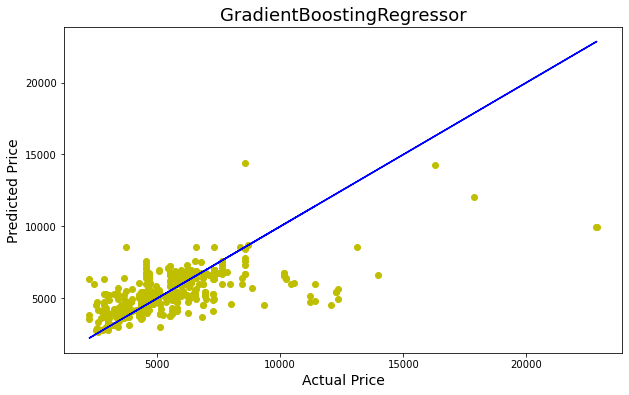

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_test,color='y')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

Our model is fitting well.


In [89]:
GBR_Score=r2_score(y_test,pred_test)*100
GBR_Score

42.43509625653326

# Saving the model


In [93]:
import joblib
joblib.dump(Finalmod,'Flight_price_Prediction.obj')

['Flight_price_Prediction.obj']